In [1]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipkernel gradio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o arquivo
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Remover coluna ID
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [5]:
# Renomear as Colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [6]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [7]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### EDA

In [8]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [9]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [10]:
# Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [11]:
# Coletar medidas das variáveis categóricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [12]:
# Coletar medidas das variáveis numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [13]:
# Imputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura},
                                inplace=True)

In [14]:
# Converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [15]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [16]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

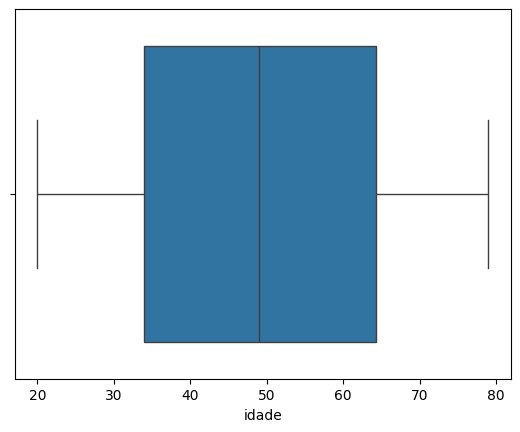

In [17]:
# Verificar / detectar outliers - Idade
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

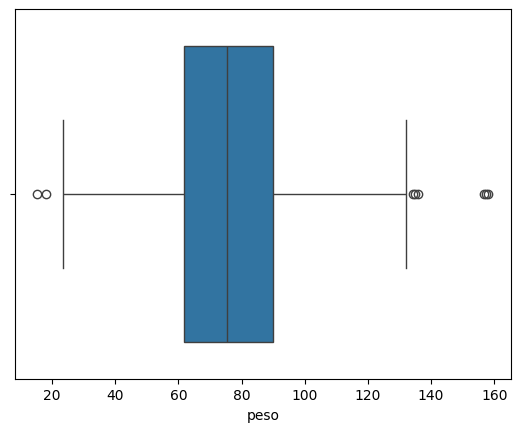

In [18]:
# Verificar / detectar outliers - Peso
sns.boxplot(data=df_colesterol_eda, x='peso')

In [19]:
# Filtrar o público a ser removido
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [20]:
# Remover público do DataFrame
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

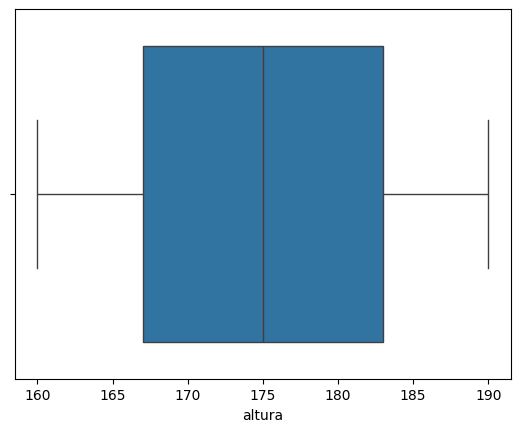

In [21]:
# Verificar / detectar outliers - Altura
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

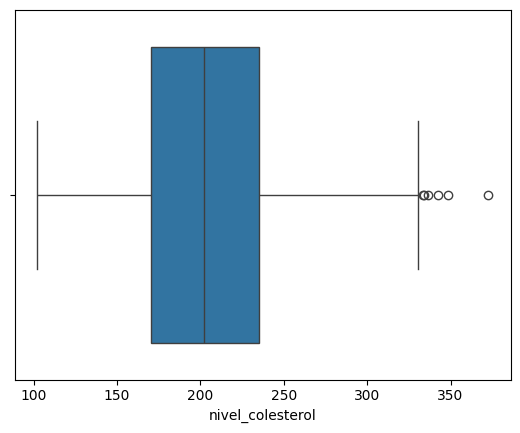

In [22]:
# Verificar / detectar outliers - Nível de Colesterol
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

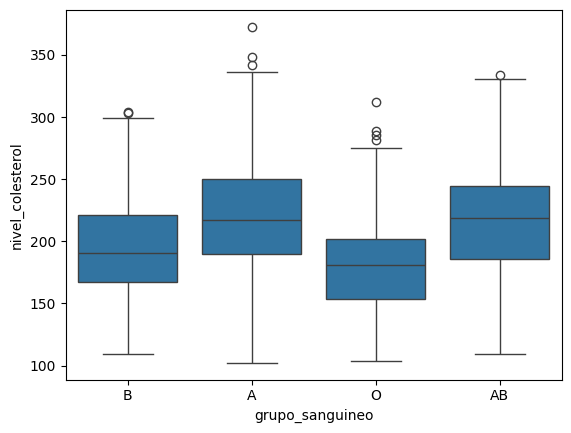

In [23]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol - Grupo Sanguíneo
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

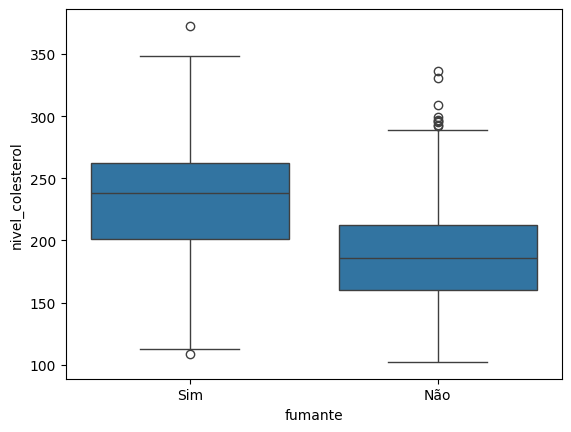

In [24]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol - Fumante
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

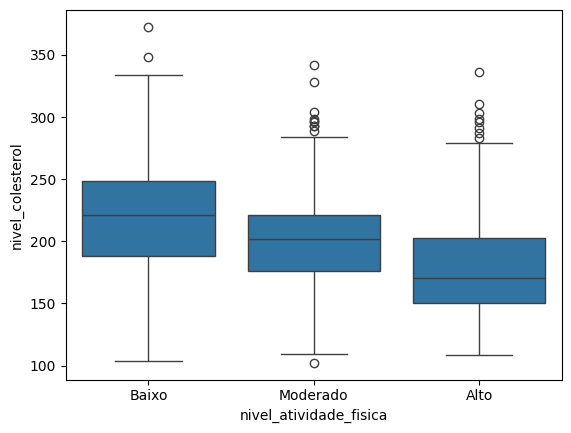

In [25]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol - Atividade Física
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

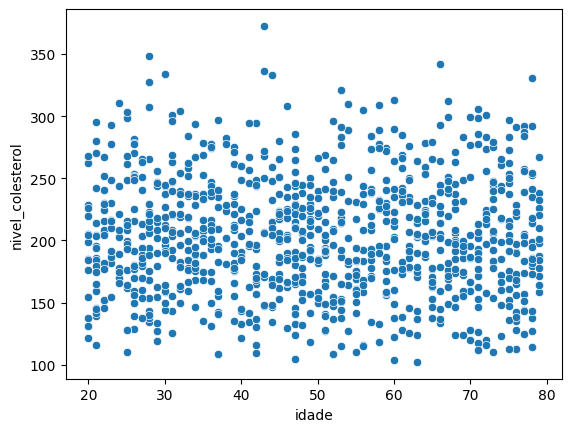

In [26]:
# Cruzamento variáveis numéricas com nível de colesterol - Idade
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

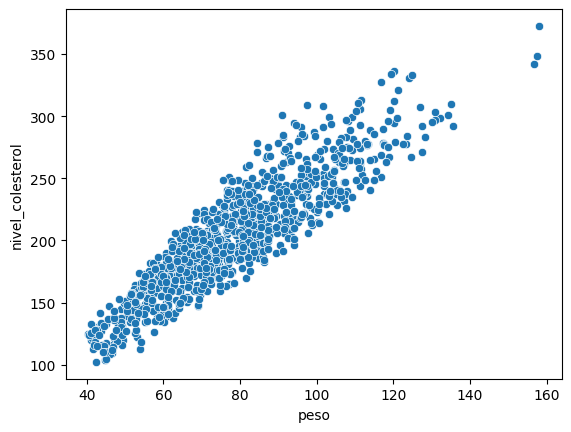

In [27]:
# Cruzamento variáveis numéricas com nível de colesterol - Peso
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

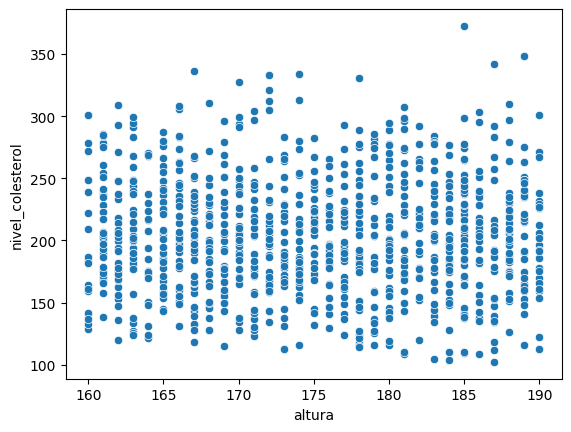

In [28]:
# Cruzamento variáveis numéricas com nível de colesterol - Altura
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

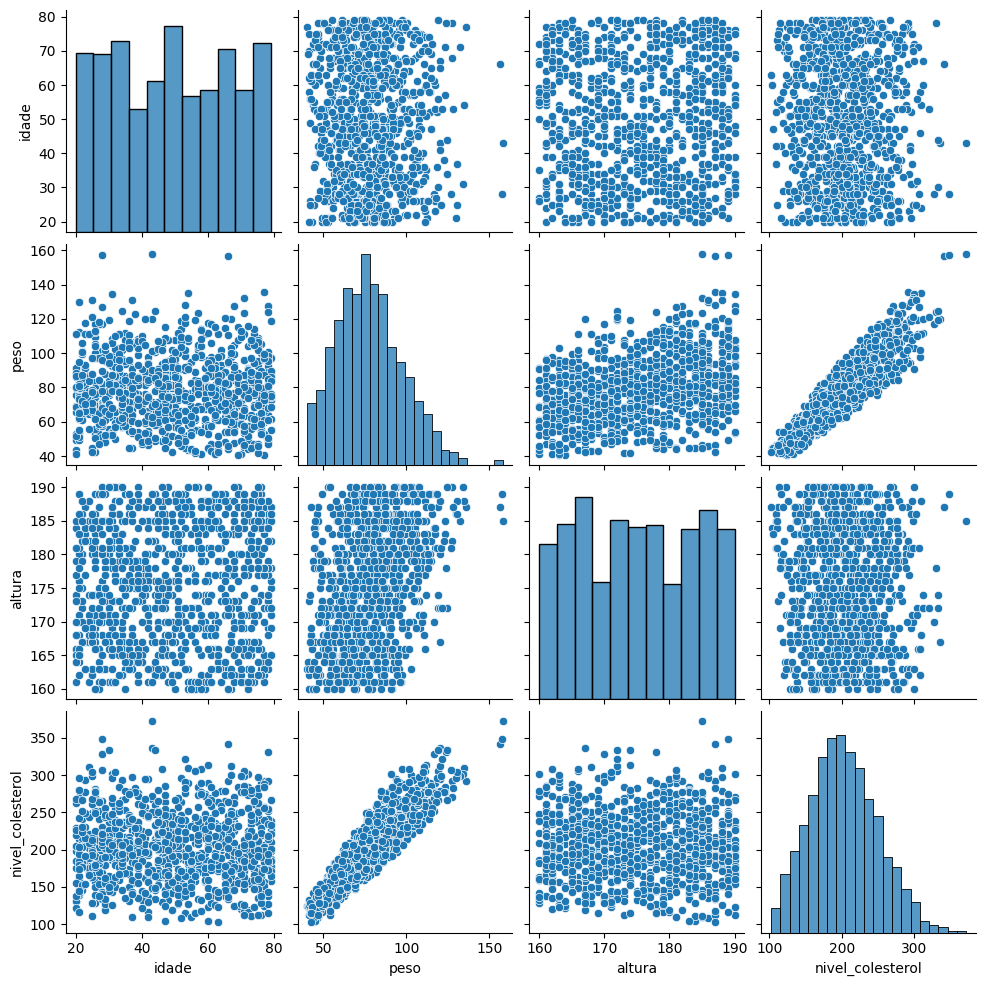

In [29]:
sns.pairplot(df_colesterol_eda)

In [30]:
# Converter variáveis categóricas nominais em numéricas, usando One-Hot Encoder do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [31]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [32]:
# Converter variável categórica ordinal em numérica, usando factorize do Pandas
df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

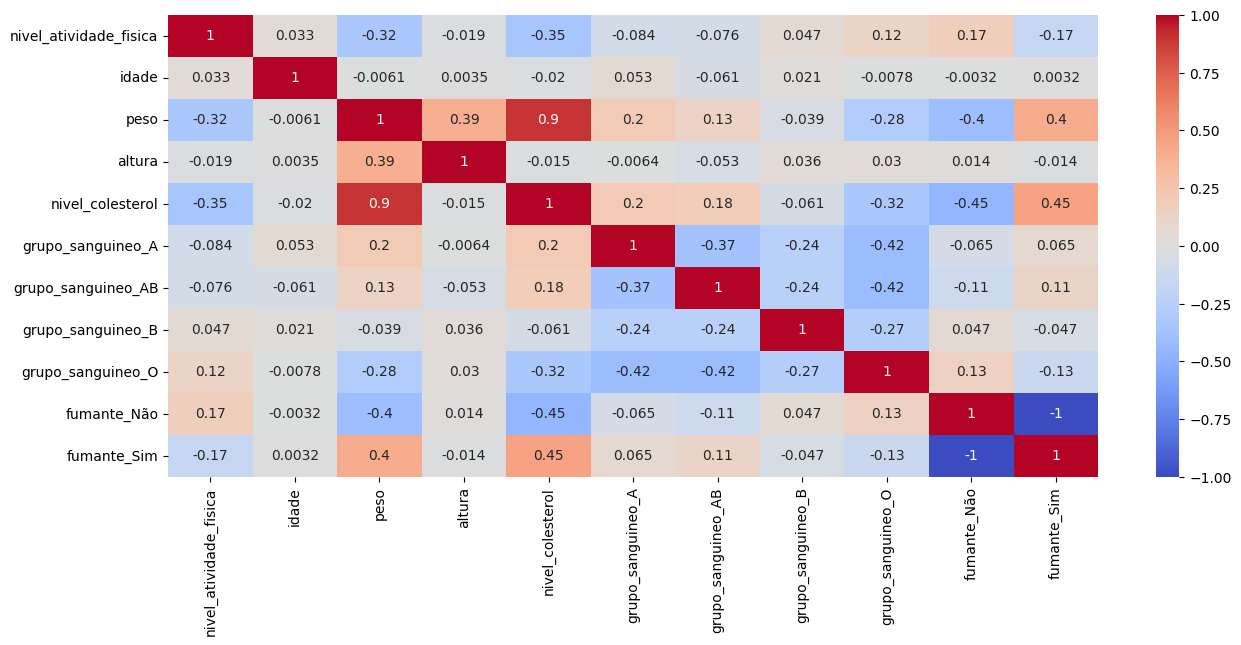

In [33]:
# Mapa de Calor com correlação entre as variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', center=0)

<Axes: >

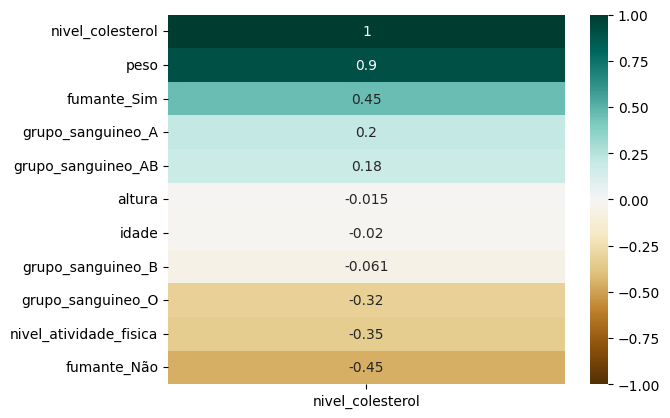

In [34]:
# Formato de Ranking, somente correlação com a variável target (nivel_colesterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG', center=0)

In [35]:
# O Bucketing é uma técnica de pré-processamento de dados que consiste em agrupar valores contínuos em intervalos discretos ou "baldes".
# Bucketing Idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins = bins_idade, labels = labels_idade, include_lowest= True)

In [36]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

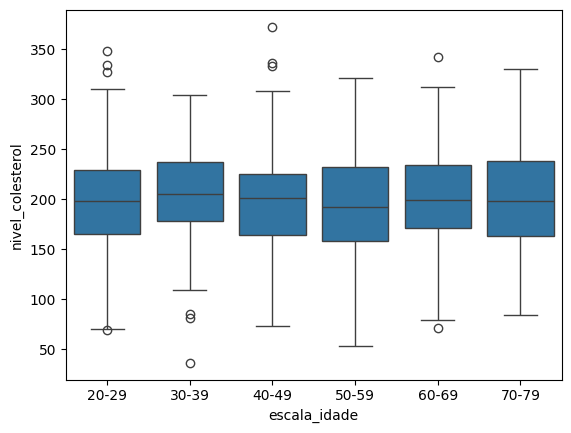

In [37]:
sns.boxplot(df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

In [38]:
# Bucketing Peso
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], bins = bins_peso, labels = labels_peso, include_lowest= True)

<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

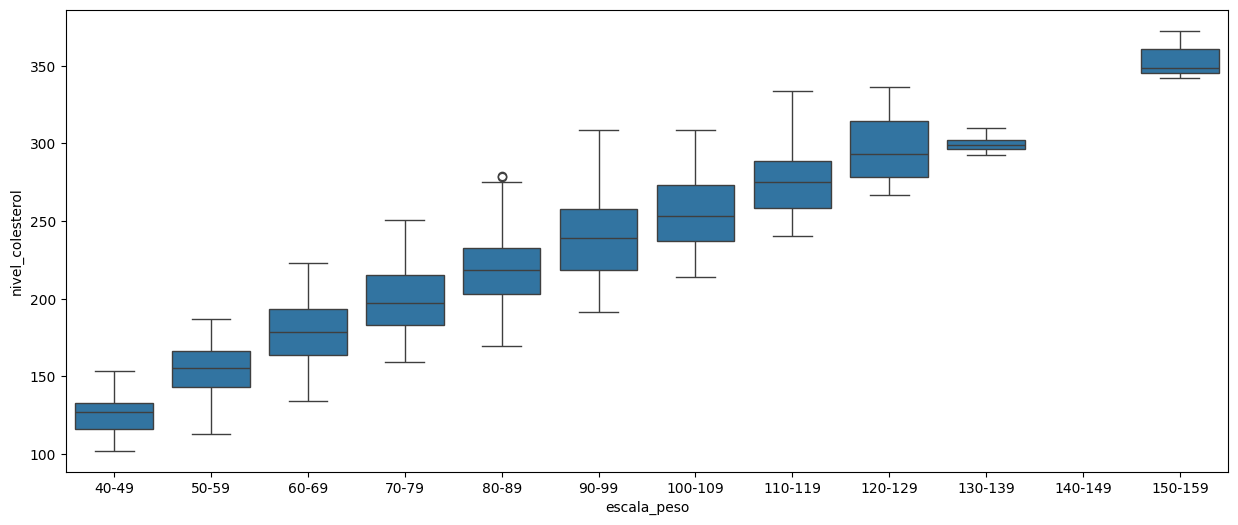

In [39]:
plt.figure(figsize=(15, 6))
sns.boxplot(df_colesterol_bucketing, x='escala_peso', y='nivel_colesterol')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [41]:
# Criar Dataset de Treino e Teste
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)


In [42]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [43]:
X = df_colesterol.drop(columns=['nivel_colesterol'], axis=1)
y = df_colesterol['nivel_colesterol']

In [44]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [45]:
y_test.shape

(289,)

In [46]:
# Pipeline de Pré-processamento
# Imputar moda nas variáveis categóricas - grupo sanguíneo, fumante e nível de atividade física
# Padronizar as variáveis numéricas - idade, peso e altura
# One-Hot Encoder nas variáveis categóricas nominais - grupo sanguíneo e fumante
# Ordinal Encoder nas variáveis categóricas ordinais - nível de atividade física
# Imputar mediana nas variáveis numéricas - idade, peso e altura

# Nomes das Colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'altura', 'peso']
colunas_ordinais = ['nivel_atividade_fisica']

In [47]:
# Transformer Categóricas
transformer_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [48]:
# Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [49]:
# Transformer Numéricas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [50]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessamento = ColumnTransformer(
    transformers=[
        ('categorias', transformer_categorias, colunas_categoricas),
        ('ordinais', transformer_ordinais, colunas_ordinais),
        ('numericas', transformer_numericas, colunas_numericas)
    ],
    remainder='passthrough'
)

In [51]:
# Criando o Pipeline principal = Pré-processamento + Regressão Linear
model_regr = Pipeline(steps=[('preprocessor', preprocessamento),
                             ('regressor', LinearRegression())])

In [52]:
# Treinar Modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorias',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ordinais',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica']),
                                                 ('numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura',
                                                   'peso'])])),
                ('regressor', LinearRegression())])

### Análise de Métricas

In [53]:
# Gerar Predição
y_pred = model_regr.predict(X_test)

In [54]:
# Calcular R2 Score
r2_score(y_test, y_pred)

0.9594250724093465

In [55]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

7.313838031022503

In [56]:
# Calcular RMSE (Root Mean Squared Error) usando Numpy
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(9.097649246487032)

### Análise de Residuos

In [57]:
# Cacular residuos
residuos = y_test - y_pred

In [58]:
# Transformar os residuos na escala padrão
# (X - media) / desvio_padrao
# (residuos - residuos.mean()) / residuos.std()
from scipy.stats import zscore
residuos_std = zscore(residuos)

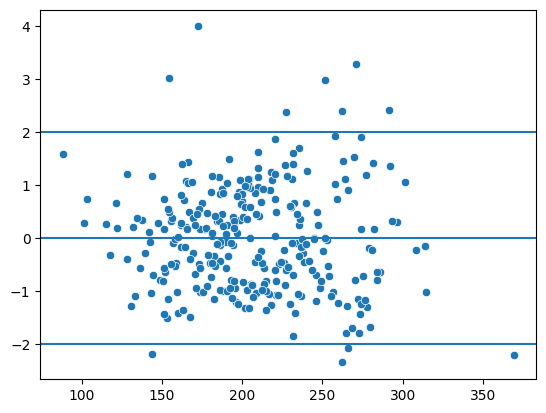

In [59]:
# Verificar linearidade dos resíduos: Valores entre -2 e +2 (Escala Padrão)
# Verifica homcedasticidade: Valores em tonro da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

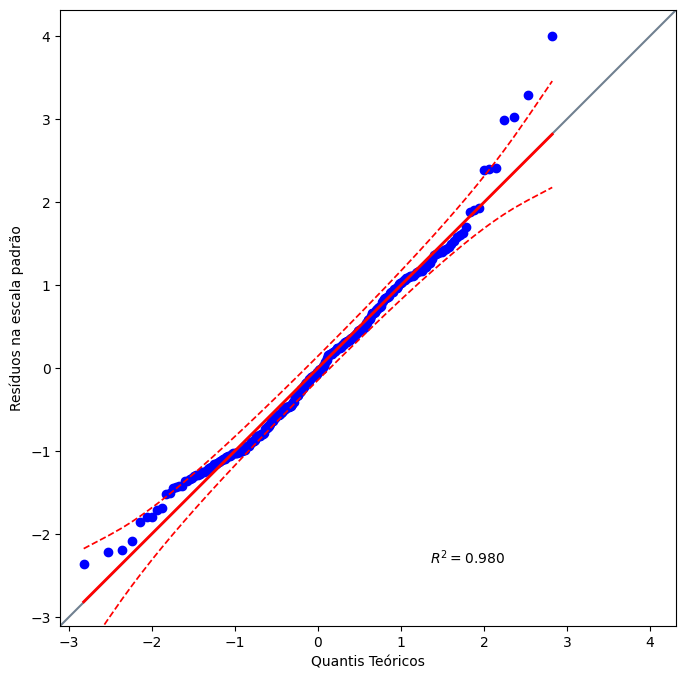

In [63]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [64]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f'Estatística Shapiro-Wilk: {stat_shapiro}, p-value: {p_value_shapiro}')
if p_value_shapiro < 0.05:
    print('Os resíduos não seguem uma distribuição normal')
else:
    print('Os resíduos seguem uma distribuição normal')

Estatística Shapiro-Wilk: 0.9807737729720732, p-value: 0.0006268860444490675
Os resíduos não seguem uma distribuição normal


In [65]:
# Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f'Estatística Kolmogorov-Smirnov: {stat_ks}, p-value: {p_value_ks}')
if p_value_ks < 0.05:
    print('Os resíduos não seguem uma distribuição normal')
else:
    print('Os resíduos seguem uma distribuição normal')

Estatística Kolmogorov-Smirnov: 0.42455920998485785, p-value: 8.925833190901912e-48
Os resíduos não seguem uma distribuição normal


In [ ]:
# Teste de Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Estatística Lilliefors: {stat_lilliefors}, p-value: {p_value_lilliefors}')
if p_value_lilliefors < 0.05:
    print('Os resíduos não seguem uma distribuição normal')
else:
    print('Os resíduos seguem uma distribuição normal')

Estatística Lilliefors: 0.049553710301926845, p-value: 0.12533323720740863
Os resíduos seguem uma distribuição normal


In [67]:
# Teste de Anderson-Darling
stat_and, critical_and, signficance_and = anderson(residuos, dist='norm')
print(f'Estatística Anderson-Darling: {stat_and}')
print(f'Valores críticos: {critical_and}')
for i in range(len(critical_and)):
    sig_level = 0.01 * (i + 1)
    print(f'Nível de significância: {sig_level}, Valor Crítico: {critical_and[i]}')
    if stat_and < critical_and[i]:
        print(f'Os resíduos seguem uma distribuição normal para o nível de significância {sig_level}')
    else:
        print(f'Os resíduos não seguem uma distribuição normal para o nível de significância {sig_level}')
        

Estatística Anderson-Darling: 0.9169275158490109
Valores críticos: [0.568 0.647 0.776 0.906 1.077]
Nível de significância: 0.01, Valor Crítico: 0.568
Os resíduos não seguem uma distribuição normal para o nível de significância 0.01
Nível de significância: 0.02, Valor Crítico: 0.647
Os resíduos não seguem uma distribuição normal para o nível de significância 0.02
Nível de significância: 0.03, Valor Crítico: 0.776
Os resíduos não seguem uma distribuição normal para o nível de significância 0.03
Nível de significância: 0.04, Valor Crítico: 0.906
Os resíduos não seguem uma distribuição normal para o nível de significância 0.04
Nível de significância: 0.05, Valor Crítico: 1.077
Os resíduos seguem uma distribuição normal para o nível de significância 0.05


In [68]:
# Teste de Homocesdasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessamento)])
X_test_scaled = pipe.fit_transform(X_test)

In [69]:
X_test_scaled

array([[ 0.        ,  1.        ,  0.        , ..., -1.44340738,
        -0.58669129,  0.22608781],
       [ 0.        ,  0.        ,  0.        , ...,  1.28157488,
        -1.05685776, -1.20886474],
       [ 0.        ,  0.        ,  1.        , ..., -1.10973608,
        -0.35160806, -0.84754575],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.00250157,
        -1.52702423, -1.09014564],
       [ 1.        ,  0.        ,  0.        , ...,  0.28056099,
        -0.35160806,  0.17447081],
       [ 0.        ,  0.        ,  0.        , ...,  0.72545605,
        -1.17439938, -1.65277092]], shape=(289, 10))

In [70]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_scaled)
print(f'Estatística Goldfeld-Quandt: {test_goldfeld[0]}, p-value: {test_goldfeld[1]}')
if test_goldfeld[1] < 0.05:
    print('Os resíduos não seguem homocedasticidade')
else:
    print('Os resíduos seguem homocedasticidade')

Estatística Goldfeld-Quandt: 0.6716135765253543, p-value: 0.9893959472385482
Os resíduos seguem homocedasticidade


## Realizar Predições Individuais

In [78]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'nivel_atividade_fisica': 'Alto',
    'idade': 40,
    'peso': 70,
    'altura': 180
}
# Criar DataFrame para predição
sample_df = pd.DataFrame([predicao_individual], index=[1])

In [79]:
model_regr.predict(sample_df)

array([165.32375099])

In [80]:
import joblib

In [81]:
# Salvar Modelo
joblib.dump(model_regr, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']